In [ ]:
!pip install plotnine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataframe mpg
from plotnine.data import mpg

In [3]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
160,subaru,forester awd,2.5,1999,4,auto(l4),4,18,24,r,suv
71,dodge,ram 1500 pickup 4wd,5.2,1999,8,manual(m5),4,11,16,r,pickup
25,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
155,pontiac,grand prix,3.8,1999,6,auto(l4),f,16,26,p,midsize
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


In [4]:
mpg.shape #ukuran data

(234, 11)

In [5]:
mpg.isnull().sum()*100/len(mpg) #check missing value

manufacturer    0.0
model           0.0
displ           0.0
year            0.0
cyl             0.0
trans           0.0
drv             0.0
cty             0.0
hwy             0.0
fl              0.0
class           0.0
dtype: float64

In [6]:
mpg.duplicated().sum() #check duplikasi data

9

In [7]:
mpg = mpg.drop_duplicates()

In [8]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   manufacturer  225 non-null    category
 1   model         225 non-null    category
 2   displ         225 non-null    float64 
 3   year          225 non-null    int64   
 4   cyl           225 non-null    int64   
 5   trans         225 non-null    category
 6   drv           225 non-null    category
 7   cty           225 non-null    int64   
 8   hwy           225 non-null    int64   
 9   fl            225 non-null    category
 10  class         225 non-null    category
dtypes: category(6), float64(1), int64(4)
memory usage: 14.9 KB


In [14]:
mpg.nunique() #check number of unique value each column

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [15]:
mpg['year'] = mpg['year'].astype(object)
mpg['cyl'] = mpg['cyl'].astype('category')

C:\Users\User\AppData\Local\Temp\ipykernel_16680\3936113082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\AppData\Local\Temp\ipykernel_16680\3936113082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
mpg.dtypes #check tipe data

manufacturer    category
model           category
displ            float64
year              object
cyl             category
trans           category
drv             category
cty                int64
hwy                int64
fl              category
class           category
dtype: object

In [17]:
mpg.describe() #summary data numeric

,displ,cty,hwy
count,225.000000,225.000000,225.000000
mean,3.449333,16.924444,23.560000
std,1.294877,4.272898,5.965466
min,1.600000,9.000000,12.000000
25%,2.400000,14.000000,18.000000
50%,3.100000,17.000000,25.000000
75%,4.600000,19.000000,27.000000
max,7.000000,35.000000,44.000000


In [19]:
mpg_cat = mpg.drop(['displ', 'cty', 'hwy'], axis=1)
mpg_cat.describe() #summary data kategorik

,manufacturer,model,year,cyl,trans,drv,fl,class
count,225,225,225,225,225,225,225,225
unique,15,38,2,4,10,3,5,7
top,toyota,jetta,1999,4,auto(l4),f,r,suv
freq,34,9,114,80,79,103,159,59


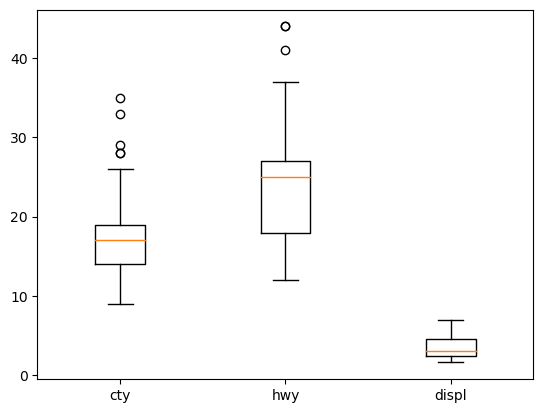

In [21]:
plt.boxplot(mpg[['cty','hwy','displ']],labels= ['cty','hwy','displ'])
plt.show()

- Boxplot city mpg (cty) dan highway mpg (hwy) menunjukkan terdapat beberapa nilai yang outlier atau bisa dikatakan adanya anomali dari datanya.
- Dari ketiga boxplot tersebut `hwy` yang memiliki persebaran data yang paling besar terlihat dari ukuran kotaknya yang lebih panjang.

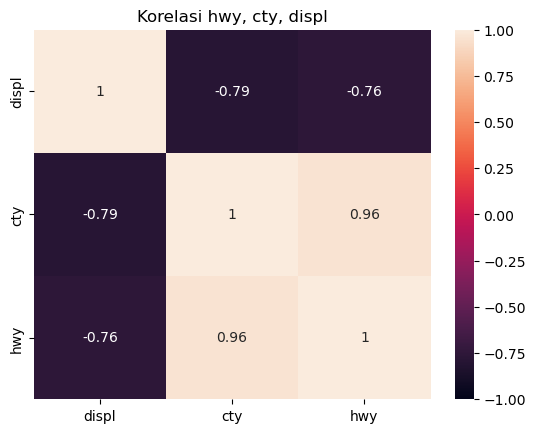

In [25]:
x = mpg.corr()
sns.heatmap(x, annot=True, vmin=-1, vmax=1).set(title='Korelasi hwy, cty, displ')
plt.show()

Dari heatmap diatas diketahui beberapa informasi:
- hubungan antara variabel `cty` dan `hwy` bisa dikatakan sangat kuat dan berkorelasi positif, terlihat dari nilai pada heatmapnya
- hubungan antara variabel `displ` dan `hwy` bisa dikatakan juga kuat, namun berkorelasi negatif

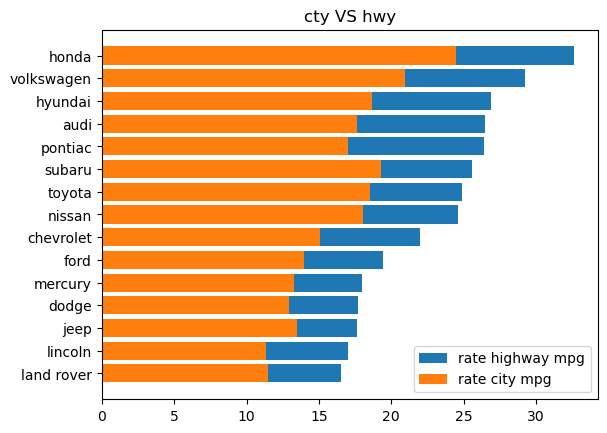

In [36]:
rate_hwy = mpg.groupby(by='manufacturer')['hwy'].mean().reset_index().sort_values(['hwy'])
rate_cty = mpg.groupby(by='manufacturer')['cty'].mean().reset_index()

plt.barh(rate_hwy['manufacturer'],rate_hwy['hwy'], label='rate highway mpg')
plt.barh(rate_cty['manufacturer'],rate_cty['cty'], label='rate city mpg')
plt.title('cty VS hwy')
plt.legend()
plt.show()

- honda memiliki rata-rata highway mpg dan rata-rata city mpg tertinggi dibanding merk lain

In [13]:
mpg2 = mpg[(mpg['manufacturer']=='honda') | (mpg['manufacturer']=='volkswagen')]
mpg2.drop('manufacturer', axis=1)

,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
99,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
100,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
101,civic,1.6,1999,4,manual(m5),f,25,32,r,subcompact
102,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact
104,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact
105,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact
106,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact
107,civic,2.0,2008,4,manual(m6),f,21,29,p,subcompact
207,gti,2.0,1999,4,manual(m5),f,21,29,r,compact
208,gti,2.0,1999,4,auto(l4),f,19,26,r,compact


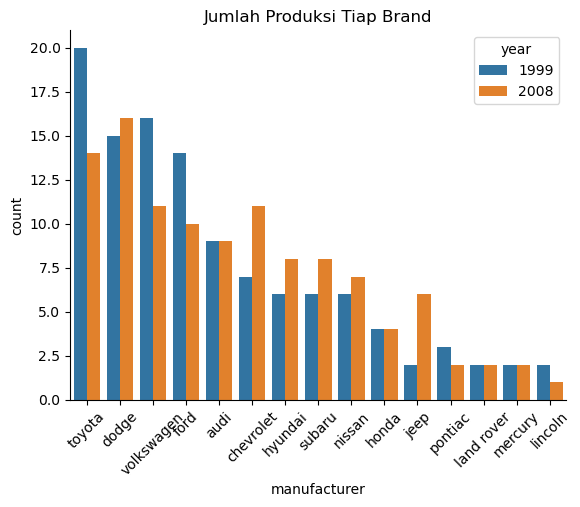

In [39]:
cnt = sns.countplot(x=mpg['manufacturer'], order = mpg['manufacturer'].value_counts().index, hue=mpg.year)
cnt.set_title("Jumlah Produksi Tiap Brand")
cnt.set_xticklabels(cnt.get_xticklabels(),rotation=45)
cnt.spines[['right', 'top']].set_visible(False)

plt.show()

Insight
- Toyota, Volkswagen dan Ford untuk tahun 1999 memiliki variasi model lebih banyak dibandingkan dengan model 2008
- Chevrolet, Dodge, Hyundai, Jeep, Nissan dan Subaru memiliki variasi model yang lebih banyak pada tahun 2008 dibandingkan 1999
- Pada tahun 1999 Toyota memiliki model dengan variasi terbanyak dibandingkan merk mobil lainnya
- Pada tahun 2008 Dodge memiliki model mobil dengan variasi terbanyak dibandingkan merk mobil lainnya

C:\Users\User\AppData\Local\Temp\ipykernel_16680\826564788.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator


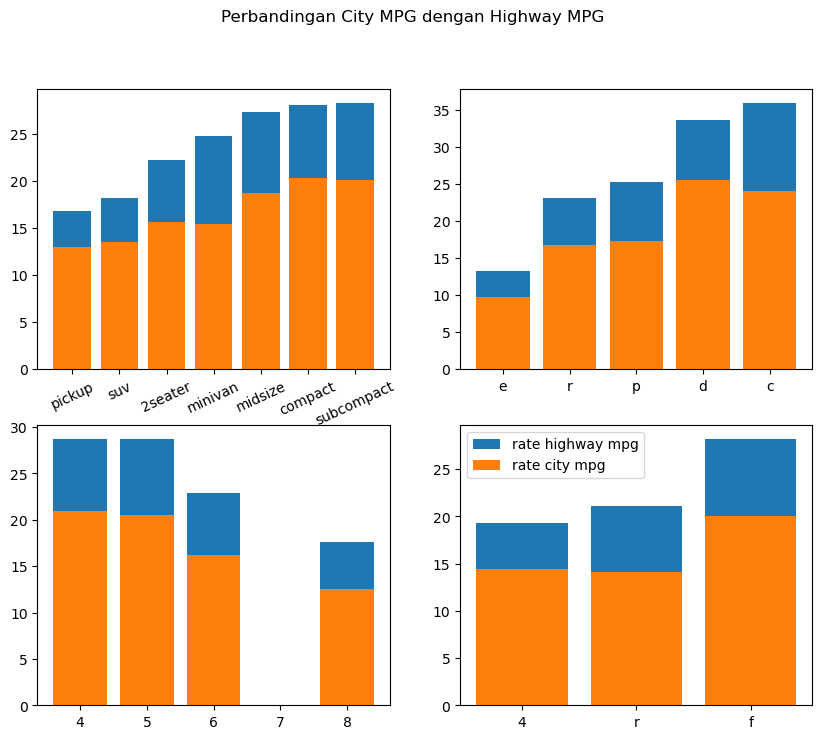

In [46]:
rate_hwy_class = mpg.groupby(by='class')['hwy'].mean().reset_index().sort_values('hwy')
rate_cty_class = mpg.groupby(by='class')['cty'].mean().reset_index().sort_values('cty')
rate_hwy_fl = mpg.groupby(by='fl')['hwy'].mean().reset_index().sort_values('hwy')
rate_cty_fl = mpg.groupby(by='fl')['cty'].mean().reset_index().sort_values('cty')
rate_hwy_cyl = mpg.groupby(by='cyl')['hwy'].mean().reset_index().sort_values('hwy')
rate_cty_cyl = mpg.groupby(by='cyl')['cty'].mean().reset_index().sort_values('cty')
rate_hwy_drv = mpg.groupby(by='drv')['hwy'].mean().reset_index().sort_values('hwy')
rate_cty_drv = mpg.groupby(by='drv')['cty'].mean().reset_index().sort_values('cty')

fig, ax = plt.subplots(2, 2,  figsize=(10, 8))
fig.suptitle('Perbandingan City MPG dengan Highway MPG')

ax[0,0].bar(rate_hwy_class['class'],rate_hwy_class['hwy'], label='rate highway mpg')
ax[0,0].bar(rate_cty_class['class'],rate_cty_class['cty'], label='rate city mpg')
ax[0,0].set_xticklabels(rate_cty_class['class'], rotation=25)

ax[0,1].bar(rate_hwy_fl['fl'],rate_hwy_fl['hwy'], label='rate highway mpg')
ax[0,1].bar(rate_cty_fl['fl'],rate_cty_fl['cty'], label='rate city mpg')

ax[1,0].bar(rate_hwy_cyl['cyl'],rate_hwy_cyl['hwy'], label='rate highway mpg')
ax[1,0].bar(rate_cty_cyl['cyl'],rate_cty_cyl['cty'], label='rate city mpg')

ax[1,1].bar(rate_hwy_drv['drv'],rate_hwy_drv['hwy'], label='rate highway mpg')
ax[1,1].bar(rate_cty_drv['drv'],rate_cty_drv['cty'], label='rate city mpg')

plt.legend()
plt.show()

- Plot 1 (Perbandingan cty dan hwy dengan class)
> - rata-rata city mpg dan rata-rata highway mpg tertinggi terdapat pada kelas subcompact
> - rata-rata city mpg dan rata-rata highway mpg terendah terdapat pada kelas pickup

- Plot 2 (Perbandingan cty dan hwy dengan fl)
> - rata-rata highway mpg tertinggi terdapat pada jenis bahan bakar c, sedangkan rata-rata city mpg tertinggi terdapat pada bahan bakar d
> - rata-rata city mpg dan rata-rata highway mpg terendah terdapat pada jenis bahan bakar e

- Plot 3 (Perbandingan cty dan hwy dengan cyl)
> - rata-rata city mpg tertinggi terdapat pada jumlah silinder 4, sedangkan untuk rata-rata highway mpg tertinggi terdapat pada jumlah silinder 4 dan 5
> - rata-rata city mpg dan rata-rata highway mpg terendah terdapat pada mobil dengan jumlah silinder 8

- Plot 4 (Perbandingan cty dan hwy dengan drv)
> - rata-rata city mpg dan rata-rata highway mpg tertinggi terdapat pada jenis penggerak front wheel drive (f)
> - rata-rata city mpg terendah terdapat pada jenis penggerak rear wheel drive (r) dan rata-rata highway mpg terendah terdapat pada penggerak 4 wheel drive (4)

### Kesimpulan

Dari hasil visualisasi diatas diketahui bahwa mobil dengan kriteria sebagai berikut:
- Jenis mobil sub compact/compact
- Menggunakan jenis bahan bakar c atau d
- Menggunakan silinder 4 atau 5
- Menggunakan jenis roda penggerak front wheel drive (fwd)

Cocok untuk pengggunaan mobil jarak jauh maupun jarak dekat (dalam kota) karena lebih irit bahan bakar